In [1]:
%matplotlib inline
import sys 
sys.path.append('..')
from preamble import *

In [15]:
# naive grid search implementation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print("Size of training set: {}   size of test set: {}".format(X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 112   size of test set: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


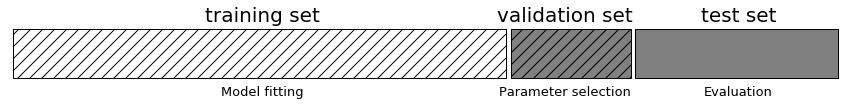

In [13]:
mglearn.plots.plot_threefold_split()

In [16]:
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: {}, size of validation set: {},size of test set: {}\n".format(
    X_train.shape[0], 
    X_valid.shape[0], 
    X_test.shape[0]))

# reference: manual_grid_search_cv
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters,
        # train an SVC
        svm = SVC(gamma=gamma, C=C)
        # perform cross-validation
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# rebuild a model on the combined training and validation set
svm = SVC(**best_parameters)

#[NOTE] 훈련 데이터와 검증 데이터를 합쳐서 다시 모델을 구성함
svm.fit(X_trainval, y_trainval)

test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 84, size of validation set: 28,size of test set: 38

Best score on validation set: 0.97
Best parameters:  {'C': 100, 'gamma': 0.001}
Test set score with best parameters: 0.97


C:\Users\SGJeong\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\SGJeong\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\SGJeong\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\SGJeong\Anaconda3\lib\site-packages\sklear

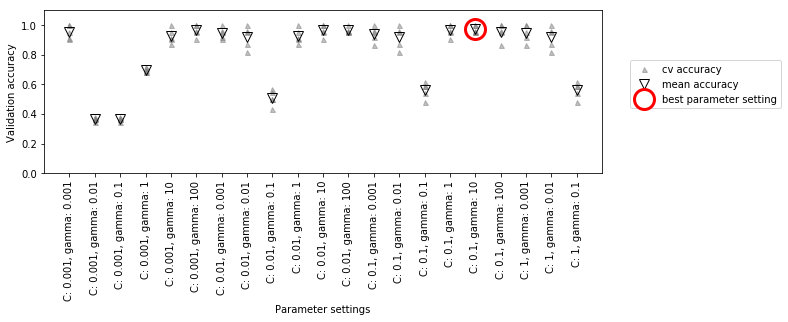

In [17]:
mglearn.plots.plot_cross_val_selection()

In [18]:
param_grid = {    
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100]
}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

estimator = SVC()
grid_search = GridSearchCV(
    estimator = estimator, 
    param_grid = param_grid, 
    n_jobs = -1, 
    cv = 5, 
    return_train_score = True
)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)


In [21]:
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [22]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.97


In [25]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.01}
Best cross-validation score: 0.97


In [26]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))


Best estimator:
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

estimator = SVC()

param_grid = {    
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(
    estimator = estimator, 
    param_grid = param_grid, 
    n_jobs = -1, 
    cv = 5, 
    return_train_score = True
)

grid_search.fit(X_train, y_train)

print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.97


In [28]:
import pandas as pd
# convert to Dataframe
results = pd.DataFrame(grid_search.cv_results_)
pd.options.display.float_format = '{:,.7f}'.format

print(results.columns)
# show the first 5 rows
# display(results.head(5))
display(results)

Index(['mean_fit_time', 'mean_score_time', 'mean_test_score',
       'mean_train_score', 'param_C', 'param_gamma', 'params',
       'rank_test_score', 'split0_test_score', 'split0_train_score',
       'split1_test_score', 'split1_train_score', 'split2_test_score',
       'split2_train_score', 'split3_test_score', 'split3_train_score',
       'split4_test_score', 'split4_train_score', 'std_fit_time',
       'std_score_time', 'std_test_score', 'std_train_score'],
      dtype='object')


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,...,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.0007922,0.0001995,0.3660714,0.3660787,...,0.0003962,0.0003990,0.0113708,0.0028518
1,0.0003987,0.0005982,0.3660714,0.3660787,...,0.0004883,0.0004884,0.0113708,0.0028518
2,0.0011964,0.0003989,0.3660714,0.3660787,...,0.0003986,0.0004886,0.0113708,0.0028518
3,0.0007976,0.0001996,0.3660714,0.3660787,...,0.0003988,0.0003991,0.0113708,0.0028518
4,0.0011967,0.0001997,0.3660714,0.3660787,...,0.0003988,0.0003994,0.0113708,0.0028518
5,0.0009973,0.0001996,0.3660714,0.3660787,...,0.0000008,0.0003992,0.0113708,0.0028518
6,0.0005986,0.0005987,0.3660714,0.3660787,...,0.0004887,0.0004888,0.0113708,0.0028518
7,0.0005987,0.0001996,0.3660714,0.3660787,...,0.0004889,0.0003991,0.0113708,0.0028518
8,0.0005982,0.0003991,0.3660714,0.3660787,...,0.0004884,0.0004888,0.0113708,0.0028518
9,0.0008075,0.0003945,0.3660714,0.3660787,...,0.0004038,0.0004833,0.0113708,0.0028518


In [29]:
results2 = results[['rank_test_score', 'params', 'mean_test_score', 'std_test_score', 
                    'mean_train_score', 'std_train_score']]
results2 = results2.sort_values('rank_test_score')
display(results2)

,rank_test_score,params,mean_test_score,std_test_score,mean_train_score,std_train_score
31,1,"{'C': 100, 'gamma': 0.01}",0.9732143,0.0223995,0.9843684,0.0054851
20,2,"{'C': 1, 'gamma': 0.1}",0.9642857,0.0340769,0.9776501,0.0100842
30,2,"{'C': 100, 'gamma': 0.001}",0.9642857,0.0340769,0.9776757,0.0070319
26,2,"{'C': 10, 'gamma': 0.1}",0.9642857,0.0177687,0.9865662,0.0083555
25,2,"{'C': 10, 'gamma': 0.01}",0.9642857,0.0340769,0.9776757,0.0070319
32,6,"{'C': 100, 'gamma': 0.1}",0.9553571,0.0495662,0.9887884,0.0099945
15,6,"{'C': 0.1, 'gamma': 1}",0.9553571,0.0401043,0.9598457,0.0113043
33,8,"{'C': 100, 'gamma': 1}",0.9464286,0.0519227,1.0000000,0.0000000
21,8,"{'C': 1, 'gamma': 1}",0.9464286,0.0324799,0.9843928,0.0088664
27,10,"{'C': 10, 'gamma': 1}",0.9375000,0.0452528,0.9865906,0.0083624


[0.36607142857142855, 0.36607142857142855, 0.36607142857142855, 0.36607142857142855, 0.36607142857142855, 0.36607142857142855, 0.36607142857142855, 0.36607142857142855, 0.36607142857142855, 0.36607142857142855, 0.36607142857142855, 0.36607142857142855, 0.36607142857142855, 0.6964285714285714, 0.9196428571428571, 0.9553571428571429, 0.36607142857142855, 0.36607142857142855, 0.6964285714285714, 0.9285714285714286, 0.9642857142857143, 0.9464285714285714, 0.9196428571428571, 0.5089285714285714, 0.9285714285714286, 0.9642857142857143, 0.9642857142857143, 0.9375, 0.9196428571428571, 0.5625, 0.9642857142857143, 0.9732142857142857, 0.9553571428571429, 0.9464285714285714, 0.9196428571428571, 0.5625]

(36,)


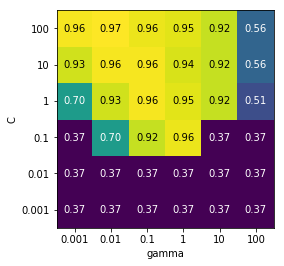

In [30]:
print([x for x in results.mean_test_score])
print()

print(results.mean_test_score.shape)

scores = np.array(results.mean_test_score).reshape(6, 6)

# plot the mean cross-validation scores
mglearn.tools.heatmap(
    scores, 
    xlabel='gamma', 
    xticklabels=param_grid['gamma'],
    ylabel='C', 
    yticklabels=param_grid['C'], 
    cmap="viridis"
)

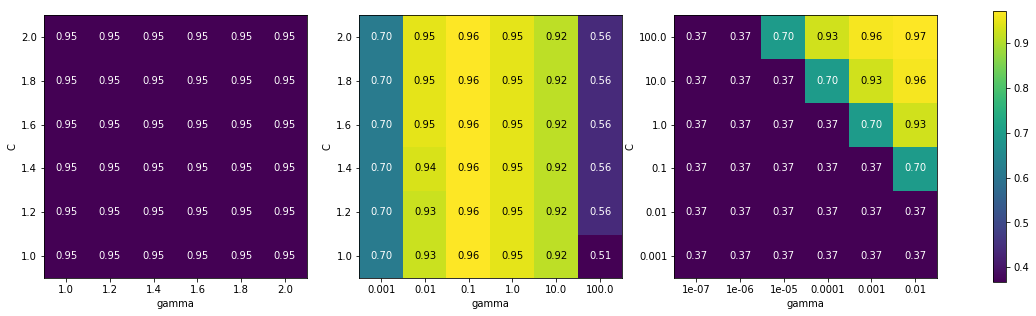

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

param_grid_linear  = {'C': np.linspace(1, 2, 6),  'gamma':  np.linspace(1, 2, 6)}
param_grid_one_log = {'C': np.linspace(1, 2, 6),  'gamma':  np.logspace(-3, 2, 6)}
param_grid_range   = {'C': np.logspace(-3, 2, 6), 'gamma':  np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log, param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, n_jobs=-1, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)

    # plot the mean cross-validation scores
    scores_image = mglearn.tools.heatmap(
        scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
        yticklabels=param_grid['C'], cmap="viridis", ax=ax)

plt.colorbar(scores_image, ax=axes.tolist())

In [32]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids:\n{}".format(param_grid))

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [33]:
grid_search = GridSearchCV(SVC(), param_grid, n_jobs=-1, cv=5, return_train_score=True)

grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score: 0.97


In [34]:
results = pd.DataFrame(grid_search.cv_results_)

results2 = results[['rank_test_score', 'params', 'mean_test_score', 'std_test_score', 
                    'mean_train_score', 'std_train_score']]
results2 = results2.sort_values('rank_test_score')
display(results2)

,rank_test_score,params,mean_test_score,std_test_score,mean_train_score,std_train_score
39,1,"{'C': 1, 'kernel': 'linear'}",0.9732143,0.0223995,0.9843684,0.0054851
31,1,"{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}",0.9732143,0.0223995,0.9843684,0.0054851
20,3,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.9642857,0.0340769,0.9776501,0.0100842
30,3,"{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}",0.9642857,0.0340769,0.9776757,0.0070319
26,3,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}",0.9642857,0.0177687,0.9865662,0.0083555
25,3,"{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}",0.9642857,0.0340769,0.9776757,0.0070319
40,3,"{'C': 10, 'kernel': 'linear'}",0.9642857,0.0338387,0.9888134,0.0070280
41,3,"{'C': 100, 'kernel': 'linear'}",0.9642857,0.0338387,0.9932579,0.0055055
32,9,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}",0.9553571,0.0495662,0.9887884,0.0099945
15,9,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",0.9553571,0.0401043,0.9598457,0.0113043


In [35]:
from sklearn.model_selection import StratifiedShuffleSplit

shuffle_split = StratifiedShuffleSplit(test_size=.8, n_splits=1)
grid_search = GridSearchCV(SVC(), param_grid, cv=shuffle_split, return_train_score=True)

grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.99


In [37]:
results = pd.DataFrame(grid_search.cv_results_)

results2 = results[['rank_test_score', 'params', 'mean_test_score', 'std_test_score', 
                    'mean_train_score', 'std_train_score']]
results2 = results2.sort_values('rank_test_score')
display(results2)

,rank_test_score,params,mean_test_score,std_test_score,mean_train_score,std_train_score
20,1,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.9888889,0.0000000,0.9090909,0.0000000
30,1,"{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}",0.9888889,0.0000000,0.9090909,0.0000000
25,1,"{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}",0.9888889,0.0000000,0.9090909,0.0000000
39,4,"{'C': 1, 'kernel': 'linear'}",0.9777778,0.0000000,0.9545455,0.0000000
38,4,"{'C': 0.1, 'kernel': 'linear'}",0.9777778,0.0000000,0.8636364,0.0000000
40,4,"{'C': 10, 'kernel': 'linear'}",0.9777778,0.0000000,1.0000000,0.0000000
32,7,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}",0.9666667,0.0000000,1.0000000,0.0000000
31,7,"{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}",0.9666667,0.0000000,0.9545455,0.0000000
26,7,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}",0.9666667,0.0000000,0.9545455,0.0000000
21,7,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.9666667,0.0000000,1.0000000,0.0000000


In [38]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    outer_best_params = []
    
    # for each split of the data in the outer cross-validation
    # (split method returns indices of training and test part)
    for training_samples, test_samples in outer_cv.split(X, y):
        # find best parameter using inner cross-validation
        best_parms = {}
        best_score = -np.inf

        # iterate over parameters
        for parameters in parameter_grid:
            # accumulate score over inner splits
            cv_scores = []

            # iterate over inner cross-validation
            for inner_train, inner_test in inner_cv.split(X[training_samples], y[training_samples]):
                # build classifier given parameters and training data
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                # evaluate on inner test set
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)

                # compute mean score over inner folds
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                # if better than so far, remember parameters
                best_score = mean_score
                best_params = parameters

        # build classifier on best parameters using outer training set
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])

        # evaluate
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
        outer_best_params.append(best_params)
    return np.array(outer_scores), outer_best_params

In [39]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold

scores, params = nested_cv(
    iris.data, 
    iris.target, 
    StratifiedKFold(5), 
    StratifiedKFold(5), 
    SVC,
    ParameterGrid(param_grid)
)

print("Cross-validation scores: {}".format(scores))
print("Mean cross-validation score: ", scores.mean())
print("best params: {}".format(params))

Cross-validation scores: [0.967 1.    0.967 0.967 1.   ]
Mean cross-validation score:  0.9800000000000001
best params: [{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}, {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}, {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}, {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}, {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}]


In [40]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_test[:10])
print()
print(len(np.where(y_test == True)[0]))
print(len(np.where(y_test == False)[0]))

(1347, 64)
(1347,)
(450, 64)
(450,)
[False False False False False False False  True False False]

47
403


In [41]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)

print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))


Unique predicted labels: [False]
Test score: 0.90


In [42]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

Test score: 0.92


In [43]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("Unique predicted labels: {}".format(np.unique(pred_dummy)))
print("dummy score: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))

Unique predicted labels: [False  True]
dummy score: 0.82
logreg score: 0.98


In [44]:
from sklearn.metrics import confusion_matrix

print(len(np.where(y_test == True)[0]))
print(len(np.where(y_test == False)[0]))

confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

47
403
Confusion matrix:
[[401   2]
 [  8  39]]


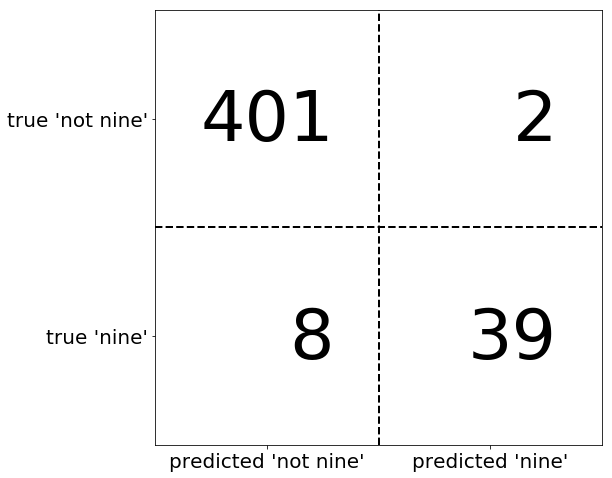

In [45]:
mglearn.plots.plot_confusion_matrix_illustration()


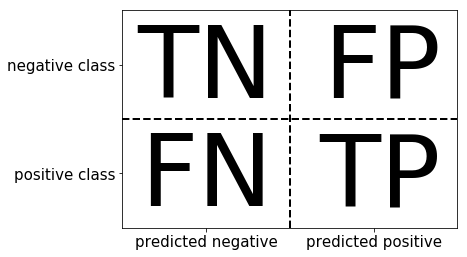

In [46]:
mglearn.plots.plot_binary_confusion_matrix()


In [47]:
from sklearn.metrics import f1_score
print("f1 score most frequent: {:.2f}".format(f1_score(y_test, pred_most_frequent)))
print("f1 score dummy: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("f1 score tree: {:.2f}".format(f1_score(y_test, pred_tree)))
print("f1 score logistic regression: {:.2f}".format(f1_score(y_test, pred_logreg)))

f1 score most frequent: 0.00
f1 score dummy: 0.09
f1 score tree: 0.55
f1 score logistic regression: 0.89


C:\Users\SGJeong\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent, target_names=["not nine", "nine"]))

             precision    recall  f1-score   support

   not nine       0.90      1.00      0.94       403
       nine       0.00      0.00      0.00        47

avg / total       0.80      0.90      0.85       450



C:\Users\SGJeong\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [49]:
print(classification_report(y_test, pred_dummy, target_names=["not nine", "nine"]))


             precision    recall  f1-score   support

   not nine       0.89      0.90      0.90       403
       nine       0.09      0.09      0.09        47

avg / total       0.81      0.82      0.81       450



In [50]:
print(classification_report(y_test, pred_logreg, target_names=["not nine", "nine"]))


             precision    recall  f1-score   support

   not nine       0.98      1.00      0.99       403
       nine       0.95      0.83      0.89        47

avg / total       0.98      0.98      0.98       450



In [51]:
from mglearn.datasets import make_blobs

X, y = make_blobs(
    n_samples=(400, 50),  # 음성 클래스: 400개, 양성 클래스: 50개
    centers=2, 
    cluster_std=[7.0, 2], 
    random_state=22
)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape)
print(y_train.shape)
print()
print(X_test.shape)
print(y_test.shape)

svc = SVC(gamma=.05).fit(X_train, y_train)

(337, 2)
(337,)

(113, 2)
(113,)


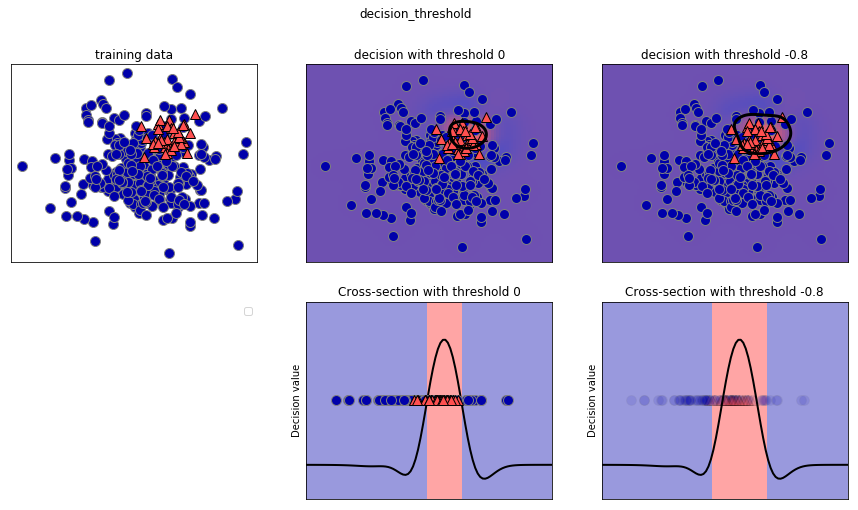

In [52]:
mglearn.plots.plot_decision_threshold()


In [53]:
print(classification_report(y_test, svc.predict(X_test)))


             precision    recall  f1-score   support

          0       0.97      0.89      0.93       104
          1       0.35      0.67      0.46         9

avg / total       0.92      0.88      0.89       113



In [54]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8
print(y_pred_lower_threshold.shape)

(113,)


In [55]:
print(classification_report(y_test, y_pred_lower_threshold))


             precision    recall  f1-score   support

          0       1.00      0.82      0.90       104
          1       0.32      1.00      0.49         9

avg / total       0.95      0.83      0.87       113



In [56]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

print("precision: {}\n".format(precision))
print("recall: {}\n".format(recall))
print("thresholds: {}\n".format(thresholds))

close_zero = np.argmin(np.abs(thresholds))
print(close_zero)
print(thresholds[close_zero])

precision: [0.321 0.296 0.308 0.32  0.333 0.348 0.364 0.381 0.4   0.368 0.333 0.353
 0.375 0.4   0.429 0.385 0.417 0.455 0.4   0.444 0.5   0.571 0.667 0.6
 0.5   0.667 0.5   1.    1.   ]

recall: [1.    0.889 0.889 0.889 0.889 0.889 0.889 0.889 0.889 0.778 0.667 0.667
 0.667 0.667 0.667 0.556 0.556 0.556 0.444 0.444 0.444 0.444 0.444 0.333
 0.222 0.222 0.111 0.111 0.   ]

thresholds: [-0.751 -0.587 -0.487 -0.444 -0.404 -0.29  -0.242 -0.193 -0.179 -0.166
 -0.16   0.086  0.146  0.192  0.37   0.52   0.523  0.532  0.632  0.744
  0.872  0.88   0.884  0.978  1.     1.07   1.084  1.251]

11
0.08620483947417501


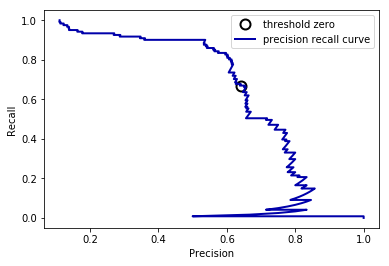

In [57]:
# create a similar dataset as before, but with more samples
# to get a smoother curve
X, y = make_blobs(
    n_samples=(4000, 500), 
    centers=2, 
    cluster_std=[7.0, 2],
    random_state=22
)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svc = SVC(gamma=.05).fit(X_train, y_train)

precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(
    precision[close_zero],
    recall[close_zero],
    'o',
    markersize=10,
    label="threshold zero",
    fillstyle="none",
    c='k',
    mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

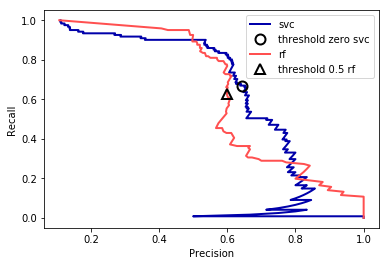

In [58]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifier has predict_proba, but not decision_function
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label="svc")

plt.plot(
    precision[close_zero], 
    recall[close_zero], 
    'o', 
    markersize=10,
    label="threshold zero svc", 
    fillstyle="none", 
    c='k', 
    mew=2)

plt.plot(precision_rf, recall_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))

plt.plot(
    precision_rf[close_default_rf], 
    recall_rf[close_default_rf], 
    '^', 
    markersize=10,
    label="threshold 0.5 rf", 
    fillstyle="none", 
    c='k',
    mew=2)

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [59]:
from sklearn.metrics import f1_score

print("f1_score of random forest: {:.3f}".format(f1_score(y_test, rf.predict(X_test))))
print("f1_score of svc: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

f1_score of random forest: 0.610
f1_score of svc: 0.656


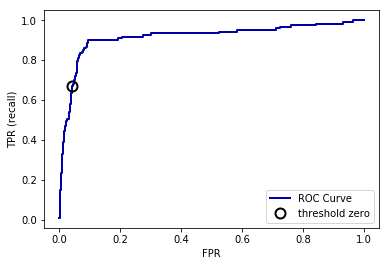

In [60]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

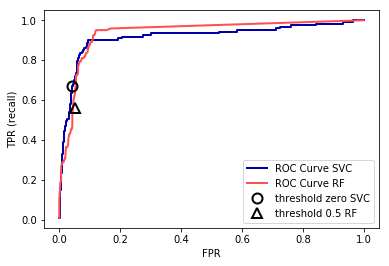

In [61]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")

plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label="threshold zero SVC", fillstyle="none", c='k', mew=2)

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10, label="threshold 0.5 RF", fillstyle="none", c='k', mew=2)

plt.legend(loc=4)

In [62]:
from sklearn.metrics import roc_auc_score

rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))

print("AUC for Random Forest: {:.3f}".format(rf_auc))
print("AUC for SVC: {:.3f}".format(svc_auc))

AUC for Random Forest: 0.937
AUC for SVC: 0.916


gamma = 1.00  accuracy = 0.90  AUC = 0.50
gamma = 0.05  accuracy = 0.90  AUC = 1.00
gamma = 0.01  accuracy = 0.90  AUC = 1.00


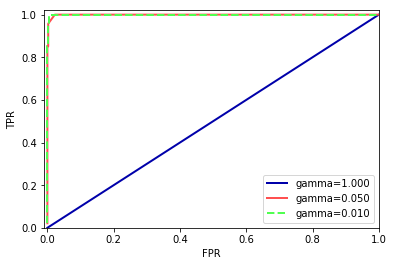

In [63]:
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

plt.figure()

for gamma in [1, 0.05, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))

    print("gamma = {:.2f}  accuracy = {:.2f}  AUC = {:.2f}".format(gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
    
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")


In [64]:
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)

lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)

print("Shape of Test data: {}".format(y_test.shape))
print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print()
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))

Shape of Test data: (450,)
Accuracy: 0.953

Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


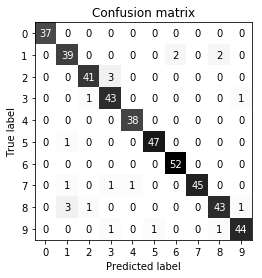

In [65]:
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred), xlabel='Predicted label',
    ylabel='True label', xticklabels=digits.target_names,
    yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d")

plt.title("Confusion matrix")
plt.gca().invert_yaxis()

In [66]:
print(classification_report(y_test, pred))


             precision    recall  f1-score   support

          0       1.00      1.00      1.00        37
          1       0.89      0.91      0.90        43
          2       0.95      0.93      0.94        44
          3       0.90      0.96      0.92        45
          4       0.97      1.00      0.99        38
          5       0.98      0.98      0.98        48
          6       0.96      1.00      0.98        52
          7       1.00      0.94      0.97        48
          8       0.93      0.90      0.91        48
          9       0.96      0.94      0.95        47

avg / total       0.95      0.95      0.95       450



In [67]:
print("Macro average f1 score: {:.3f}".format(f1_score(y_test, pred, average="macro")))

print("Weighted average f1 score: {:.3f}".format(f1_score(y_test, pred, average="weighted")))

print("Micro average f1 score: {:.3f}".format(f1_score(y_test, pred, average="micro")))

Macro average f1 score: 0.954
Weighted average f1 score: 0.953
Micro average f1 score: 0.953


In [68]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

y_test = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

print("explained_variance_score:", explained_variance_score(y_test, y_pred))
print("mean_absolute_error:", mean_absolute_error(y_test, y_pred))
print("mean_squared_error:", mean_squared_error(y_test, y_pred))
print("mean_squared_log_error:", mean_squared_log_error(y_test, y_pred))
print("median_absolute_error:", median_absolute_error(y_test, y_pred))
print("r2_score:", r2_score(y_test, y_pred))

explained_variance_score: 0.9571734475374732
mean_absolute_error: 0.5
mean_squared_error: 0.375
mean_squared_log_error: 0.12803912255571967
median_absolute_error: 0.5
r2_score: 0.9486081370449679


In [69]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import GradientBoostingRegressor

X, y = mglearn.datasets.make_wave(n_samples=200)
print("X shape: {}".format(X.shape))
print("y shape: {}".format(y.shape))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))

print()

param_grid = {    
    'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100],
    'alpha': [0.1, 0.3, 0.5, 0.7, 0.9]
}

estimator = GradientBoostingRegressor()

grid_search = GridSearchCV(
    estimator = estimator, 
    param_grid = param_grid, 
    n_jobs = -1, 
    cv = 5, 
    return_train_score = True
)

grid_search.fit(X_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))
print("Best parameters:\n{}".format(grid_search.best_params_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

y_pred = gbr.predict(X_test)

print()

# Possible scoring
print("explained_variance_score:", explained_variance_score(y_test, y_pred))
print("mean_absolute_error:", mean_absolute_error(y_test, y_pred))
print("mean_squared_error:", mean_squared_error(y_test, y_pred))
#print("mean_squared_log_error:", mean_squared_log_error(y_test, y_pred))
print("median_absolute_error:", median_absolute_error(y_test, y_pred))
print("r2_score:", r2_score(y_test, y_pred))

X shape: (200, 1)
y shape: (200,)
X_train shape: (150, 1)
X_test shape: (50, 1)

Best cross-validation accuracy: 0.67
Best parameters:
{'alpha': 0.1, 'learning_rate': 0.1}
Best estimator:
GradientBoostingRegressor(alpha=0.1, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)
Test set score: 0.62


NameError: name 'gbr' is not defined

In [70]:
# default scoring for classification is accuracy
scores = cross_val_score(SVC(), digits.data, digits.target == 9)
print("Default scoring: {}".format(scores))

# providing scoring="accuracy" doesn't change the results
scores2 = cross_val_score(SVC(), digits.data, digits.target == 9, scoring="accuracy")
print("Explicit accuracy scoring: {}".format(scores2))

print()

# 곡선의 면적을 활용한 성능 측정 (Recommended)
roc_auc = cross_val_score(SVC(), digits.data, digits.target == 9, scoring="roc_auc")
print("ROC_AUC scoring: {}".format(roc_auc))

average_precision = cross_val_score(SVC(), digits.data, digits.target == 9, scoring="average_precision")
print("Average Precision scoring: {}".format(average_precision))

print()

# 다양한 성능 측정 (Not Recommended)
precision = cross_val_score(SVC(), digits.data, digits.target == 9, scoring="precision_weighted")
print("Precision scoring: {}".format(precision))

recall = cross_val_score(SVC(), digits.data, digits.target == 9, scoring="recall_weighted")
print("Precision scoring: {}".format(recall))

f1_score = cross_val_score(SVC(), digits.data, digits.target == 9, scoring="f1_weighted")
print("F1_score scoring: {}".format(f1_score))

Default scoring: [0.9 0.9 0.9]
Explicit accuracy scoring: [0.9 0.9 0.9]

ROC_AUC scoring: [0.994 0.99  0.996]
Average Precision scoring: [0.96  0.953 0.978]

Precision scoring: [0.81 0.81 0.81]
Precision scoring: [0.9 0.9 0.9]
F1_score scoring: [0.852 0.852 0.852]


In [71]:
scores = cross_val_score(SVC(), digits.data, digits.target, scoring="accuracy")
print("Explicit accuracy scoring: {}".format(scores))

f1_weighted = cross_val_score(SVC(), digits.data, digits.target, scoring="f1_weighted")
print("F1_weighted scoring: {}".format(f1_weighted))

Explicit accuracy scoring: [0.394 0.411 0.46 ]
F1_weighted scoring: [0.439 0.463 0.524]


In [72]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target == 9, random_state=0)

# we provide a somewhat bad grid to illustrate the point:
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}

# using the default scoring of accuracy:
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("Grid-Search with accuracy")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (accuracy)): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))

print()

# using AUC scoring instead:
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="roc_auc")
grid.fit(X_train, y_train)
print("Grid-Search with AUC")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (AUC): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))

Grid-Search with accuracy
Best parameters: {'gamma': 0.0001}
Best cross-validation score (accuracy)): 0.970
Test set AUC: 0.992
Test set accuracy: 0.973

Grid-Search with AUC
Best parameters: {'gamma': 0.01}
Best cross-validation score (AUC): 0.997
Test set AUC: 1.000
Test set accuracy: 1.000


In [73]:
from sklearn.metrics.scorer import SCORERS
print("Available scorers:\n{}".format(sorted(SCORERS.keys())))

Available scorers:
['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'log_loss', 'mean_absolute_error', 'mean_squared_error', 'median_absolute_error', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']
